# Athenahealth Sr. Analytics Associate - Interview

**Date:** Mar 23, 2021 <br>

## Candidate Details
**Candidate:** Mark Mann <br>
**LinkedIn:** [https://www.linkedin.com/in/mark-mann](https://www.linkedin.com/in/mark-mann) <br>
**Github:** [https://github.com/mann-brinson](https://github.com/mann-brinson) <br>
**Medium:** [https://medium.com/@mann.brinson](https://medium.com/@mann.brinson) <br>
**YouTube:** [https://www.youtube.com/channel/UCwQfEkux-qlgSpVuKax_7Xg/videos](https://www.youtube.com/channel/UCwQfEkux-qlgSpVuKax_7Xg/videos) <br>



In [1]:
import pandas as pd
import os
import random
import math
import plotly.graph_objects as go
import plotly.express as px

from IPython import display

In [2]:
# DATA FOLDERS
data_folder = "queries/"

part1_q1q2_rate = f"{data_folder}part1/q1q2_rate.csv"
part1_q3_dar_avg = f"{data_folder}part1/q3_dar_avg.csv"

part2_q1_d_inflow = f"{data_folder}part2/q1_d_inflow2.csv"
part2_q3_d_inflow_context_errorgroup = f"{data_folder}part2/q3_d_inflow_context_errorgroup2.csv"
part2_q3_d_inflow_context_errortype = f"{data_folder}part2/q3_d_inflow_context_errortype2.csv"
part2_q3_d_inflow_context_kickcode = f"{data_folder}part2/q3_d_inflow_context_kickcode2.csv"

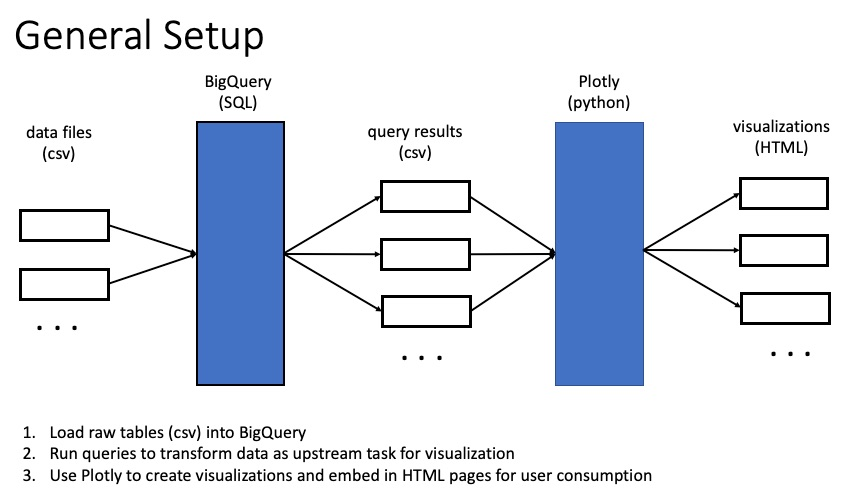

In [3]:
display.Image("https://athena-interview-2021.s3-us-west-1.amazonaws.com/setup.jpg")

# PART 1

## **Q1 : What top 3 context IDs are improving each metric?** <br>
HOW: Dataframe sorted by contexts with highest change in specific metric

**DAR** - Highest negative change <br>

In [4]:
df_1 = pd.read_csv(part1_q1q2_rate)
df_1[df_1['METRIC'] == "DAR"].sort_values(by=['D_RATE'], ascending=True).head(3)

,REPORTDATE,CONTEXTID,METRIC,NUMERATOR,DENOMINATOR,RATE,PREV_RATE,D_RATE
76,2017-01-01,9306,DAR,211666,2514,84.1949,114.3741,-26.39
274,2017-01-01,3522,DAR,2052349,104198,19.6966,24.0203,-18.00
111,2017-01-01,3830,DAR,2986757,52108,57.3186,68.2736,-16.05


**INFLOW** - Highest negative change

In [5]:
df_1[df_1['METRIC'] == "INFLOW"].sort_values(by=['D_RATE'], ascending=True).head(3)

,REPORTDATE,CONTEXTID,METRIC,NUMERATOR,DENOMINATOR,RATE,PREV_RATE,D_RATE
153,2017-01-01,7363,INFLOW,2908,23611,0.1232,0.3149,-60.88
226,2017-01-01,6814,INFLOW,1655,7425,0.2229,0.4397,-49.31
306,2017-01-01,11284,INFLOW,10607,10934,0.9701,1.8165,-46.60


**TOS** - Highest postive change

In [6]:
df_1[df_1['METRIC'] == "TOS2016"].sort_values(by=['D_RATE'], ascending=False).head(3)

,REPORTDATE,CONTEXTID,METRIC,NUMERATOR,DENOMINATOR,RATE,PREV_RATE,D_RATE
149,2017-01-01,8254,TOS2016,242,2602,0.0930,0.0154,503.90
66,2017-01-01,7661,TOS2016,13694,108998,0.1256,0.0627,100.32
144,2017-01-01,13142,TOS2016,32998,149018,0.2214,0.1152,92.19


## **Q2 : What top 3 context IDs are hurting each metric?**

**DAR** - Highest positive change

In [7]:
df_1[df_1['METRIC'] == "DAR"].sort_values(by=['D_RATE'], ascending=False).head(3)

,REPORTDATE,CONTEXTID,METRIC,NUMERATOR,DENOMINATOR,RATE,PREV_RATE,D_RATE
157,2017-01-01,5580,DAR,5325955,248,21475.6250,432.0384,4870.77
14,2017-01-01,11284,DAR,107204973,1199072,89.4066,60.8949,46.82
25,2017-01-01,2677,DAR,422437,2502,168.8397,121.1724,39.34


**Inflow** - Highest positive change

In [8]:
df_1[df_1['METRIC'] == "INFLOW"].sort_values(by=['D_RATE'], ascending=False).head(3)

,REPORTDATE,CONTEXTID,METRIC,NUMERATOR,DENOMINATOR,RATE,PREV_RATE,D_RATE
120,2017-01-01,10,INFLOW,13381,7850,1.7046,0.1776,859.80
289,2017-01-01,3830,INFLOW,6179,5475,1.1286,0.5583,102.15
173,2017-01-01,14035,INFLOW,2817,8812,0.3197,0.1882,69.87


**TOS** - Highest negative change

In [9]:
df_1[df_1['METRIC'] == "TOS2016"].sort_values(by=['D_RATE'], ascending=True).head(3)

,REPORTDATE,CONTEXTID,METRIC,NUMERATOR,DENOMINATOR,RATE,PREV_RATE,D_RATE
250,2017-01-01,9306,TOS2016,0,125,0.0000,0.5000,-100.00
209,2017-01-01,11476,TOS2016,1873,13122,0.1427,0.3197,-55.36
216,2017-01-01,3475,TOS2016,1489,30121,0.0494,0.1026,-51.85


## **Q3: What client had highest negative change in DAR (improvement) from Oct - Jan? What is this client's impact to athena's overall DAR** 

**HOW:** Bar graph showing ΔDAR Sorted from low to high for each context, with line showing athena avg.

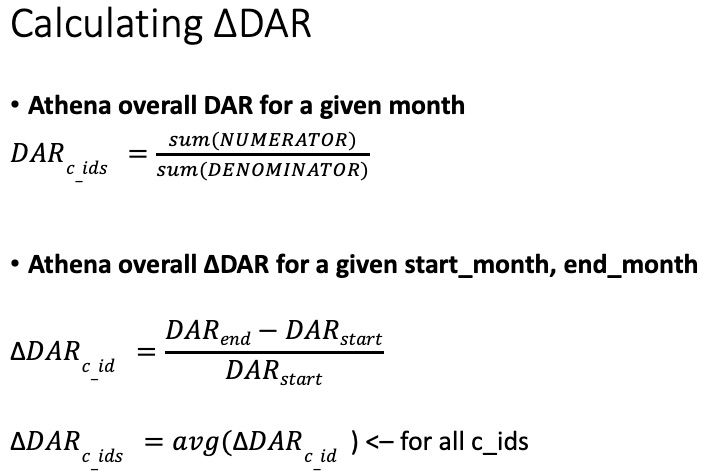

In [10]:
display.Image("https://athena-interview-2021.s3-us-west-1.amazonaws.com/dar_calc.jpg")

In [34]:
df_1_3 = pd.read_csv(part1_q3_dar_avg)
df_1_3["CONTEXTID"] = df_1_3['CONTEXTID'].astype(str)
df_1_3.head()

,REPORTDATE,CONTEXTID,METRIC,NUMERATOR,DENOMINATOR,DAR,PREV_DAR,D_DAR,D_DAR_SUM,N_CONTEXTS,D_DAR_AVG
0,2017-01-01,5045,DAR,1140731,17046,66.92,81.26,-17.6471,466.9901,107,4.3644
1,2017-01-01,9306,DAR,211666,2514,84.19,98.91,-14.8822,466.9901,107,4.3644
2,2017-01-01,1334,DAR,2341032,65258,35.87,41.85,-14.2891,466.9901,107,4.3644
3,2017-01-01,3830,DAR,2986757,52108,57.32,64.00,-10.4375,466.9901,107,4.3644
4,2017-01-01,1267,DAR,2085253,65091,32.04,35.53,-9.8227,466.9901,107,4.3644


In [48]:
fig = px.bar(df_1_3, x="CONTEXTID", 
                     y="D_DAR",
                     title="D_DAR from Dec 2016 to Jan 2017 for all athena contexts."
            )
fig.add_hline(y=list(df_1_3["D_DAR_AVG"])[0], line_dash="dot",
              annotation_text="Avg ΔDAR", 
              annotation_position="top left")

fig.show()

- Less than half clients decreased their DAR from Dec 2016 to Jan 2017
- D_DAR would be decreased significantly if we exclude the top three contexts with high positive D_DAR (376, 11284, and 2677)

# PART 2

## **Q1: What are the top drivers of Inflow and how do those fluctuate month to month?**


- This question is answered in more deteail below
- We will look at why the client inflow increased at the client-level, client/errorgroup, client/errortype, and client/kickcode levels



## **Q2: What clients are top drivers to Inflow? How has their performance impacted the overall Inflow Rate?**

### Chart 1: Line chart comparing context inflow against athena avg inflow over time
**WHY:** Inflow across contexts over time, focus on helping contexts with highest inflow 

In [13]:
df_2_2 = pd.read_csv(part2_q1_d_inflow)
df_2_2.sort_values(by=['CONTEXTID', 'MONTH'], inplace=True)
df_2_2.head(5)

,MONTH,CONTEXTID,N_ERRORS,ATHENA_MONTH_CLMCNT,INFLOW,PREV_INFLOW,ATHENA_MONTH_INFLOW,D_INFLOW,ATHENA_MONTH_INFLOW_PREV,D_ATHENA_INFLOW
382,2016-10-01,10,1674,2009916,0.0833,NaN,0.3341,NaN,NaN,NaN
274,2016-11-01,10,1388,2004388,0.0692,0.0833,0.3477,-16.9268,0.3341,4.0706
162,2016-12-01,10,1337,2037813,0.0656,0.0692,0.3383,-5.2023,0.3477,-2.7035
50,2017-01-01,10,13381,2112195,0.6335,0.0656,0.3440,865.7012,0.3383,1.6849
412,2016-10-01,55,4564,2009916,0.2271,NaN,0.3341,NaN,NaN,NaN


In [46]:
df_2_2_1 = df_2_2.query("N_ERRORS > 0") # Show contexts with small amount of errors
fig = px.line(df_2_2_1, x="MONTH", y="INFLOW",
              line_group="CONTEXTID", hover_name="CONTEXTID",
             title="Inflow by context from Oct 2016 to Jan 2017")

fig.add_trace(go.Scatter(x=df_2_2_1['MONTH'], y=df_2_2_1['ATHENA_MONTH_INFLOW'],
                    mode='lines',
                    name='ATHENA_MONTH_INFLOW',
                    line=dict(color='orange', width=4)))

fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

- On a client basis, there were 9 clients that maintained Inflow > 1 from Oct to Dec.
- These 9 clients with very high inflow increased the average Inflow rate for all of athena

### Chart 2: Bar graph showing ΔInflow (Dec, Jan) by context, sorted from high to low

In [49]:
df_2_2_2 = df_2_2.query("MONTH == '2017-01-01'").sort_values(by=['D_INFLOW'], ascending=False)
df_2_2_2["CONTEXTID"] = df_2_2_2['CONTEXTID'].astype(str)
df_2_2_2.head()

,MONTH,CONTEXTID,N_ERRORS,ATHENA_MONTH_CLMCNT,INFLOW,PREV_INFLOW,ATHENA_MONTH_INFLOW,D_INFLOW,ATHENA_MONTH_INFLOW_PREV,D_ATHENA_INFLOW
50,2017-01-01,10,13381,2112195,0.6335,0.0656,0.344,865.7012,0.3383,1.6849
74,2017-01-01,14035,2817,2112195,0.1334,0.0792,0.344,68.4343,0.3383,1.6849
52,2017-01-01,1610,3748,2112195,0.1774,0.1061,0.344,67.2008,0.3383,1.6849
58,2017-01-01,9306,17,2112195,0.0008,0.0005,0.344,60.0000,0.3383,1.6849
10,2017-01-01,718,4697,2112195,0.2224,0.1481,0.344,50.1688,0.3383,1.6849


In [50]:
fig = px.bar(df_2_2_2, x="CONTEXTID", 
                     y="D_INFLOW",
                     title="D_Inflow from Dec 2016 to Jan 2017 for all athena contexts."
            )
fig.add_hline(y=list(df_2_2_2["D_ATHENA_INFLOW"])[0], line_dash="dot",
              annotation_text="Avg Δ Inflow", 
              annotation_position="bottom left")

fig.show()

- Context 10 is an outlier and had the highest D_Inflow > 800. Was this client or product-related issue? 

## **Q3: Why did inflow get worse in Jan?**

### Chart 1: Count inflow by client-errorgroup. Focus on error counts with d_inflow > k. <br>
**WHY:** Identifies trends in client inflow across errorgroups

- k = 100 in the below case, but can be a dynamic paramter with some adjustment
- Showing records from Jan 2017 only

In [17]:
df_2_3_1 = pd.read_csv(part2_q3_d_inflow_context_errorgroup)

In [18]:
#Make a mapping of errorgroups to color ids
colmap = dict()
idx = 1
for x in df_2_3_1["ERRORGROUP"]:
    if x not in colmap: 
        colmap[x] = idx
        idx +=1

#Update ContextID to be a string, and add ErrorGroup_Color as a new column
df_2_3_1["CONTEXTID"] = df_2_3_1['CONTEXTID'].astype(str)
df_2_3_1["ERRORGROUP_COLOR"] = [str(colmap[x]) for x in df_2_3_1["ERRORGROUP"]]
df_2_3_1.sort_values(by=['D_INFLOW'], ascending=False, inplace=True)
df_2_3_1.head()

,MONTH,CONTEXTID,ERRORGROUP,N_ERRORS,ATHENA_MONTH_CLMCNT,INFLOW,PREV_INFLOW,ATHENA_MONTH_INFLOW,D_INFLOW,ATHENA_MONTH_INFLOW_PREV,D_ATHENA_INFLOW,ERRORGROUP_COLOR
45,2017-01-01,11903,Local/Network Rules,179,2112195,0.008475,0.000049,0.019801,17195.918367,0.019764,0.1872,3
0,2017-01-01,10,Credentialing/Prov Info,12140,2112195,0.574758,0.004809,0.019801,11851.715533,0.019764,0.1872,1
63,2017-01-01,3928,Custom Rules,95,2112195,0.004498,0.000050,0.019801,8896.000000,0.020054,-1.2616,13
23,2017-01-01,819,Remittance Complication,530,2112195,0.025092,0.000442,0.019801,5576.923077,0.019764,0.1872,4
43,2017-01-01,3522,Remittance Complication,198,2112195,0.009374,0.000344,0.019801,2625.000000,0.019764,0.1872,4


In [19]:
fig = px.bar(df_2_3_1, x="CONTEXTID", 
                     y="D_INFLOW", 
                     color="ERRORGROUP_COLOR", 
                     title="Large increases in inflow from Dec 2016 to Jan 2017 by Context and Errorgroup",
                     text="ERRORGROUP",
            )

#Add a horizontal line for athena avg
fig.add_hline(y=list(df_2_2_2["D_ATHENA_INFLOW"])[0], line_dash="dot",
              annotation_text="Avg Δ Inflow", 
              annotation_position="bottom left")

fig.update(layout_showlegend=False)
fig.show()

- Local/Network Rules (blue), Credentialing/Prov Info (red), and Custom Rules (green) make up the largest volume of D_Inflow
- Context 10 had the largest increase in inflow overall by client, and all mostlly related to Credentialing

### Chart 2: Count inflow by client-errortype. Focus on error counts with d_inflow > k. <br>
**WHY:** Identifies trends in client inflow across errortypes

- k = 100 in the below case, but can be a dynamic paramter with some adjustment
- Showing records from Jan 2017 only

In [20]:
df_2_3_2 = pd.read_csv(part2_q3_d_inflow_context_errortype)

In [21]:
#Make a mapping of errorgroups to color ids
colmap = dict()
idx = 1
for x in df_2_3_2["ERRORTYPE"]:
    if x not in colmap: 
        colmap[x] = idx
        idx +=1

#Update ContextID to be a string, and add ErrorType_Color as a new column
df_2_3_2["CONTEXTID"] = df_2_3_2['CONTEXTID'].astype(str)
df_2_3_2["ERRORTYPE_COLOR"] = [str(colmap[x]) for x in df_2_3_2["ERRORTYPE"]]
df_2_3_2.sort_values(by=['D_INFLOW'], ascending=False, inplace=True)
df_2_3_2.head()

,MONTH,CONTEXTID,ERRORTYPE,N_ERRORS,ATHENA_MONTH_CLMCNT,INFLOW,PREV_INFLOW,ATHENA_MONTH_INFLOW,D_INFLOW,ATHENA_MONTH_INFLOW_PREV,D_ATHENA_INFLOW,ERRORTYPE_COLOR
6,2017-01-01,11903,LOCAL,179,2112195,0.008475,0.000049,0.091311,17195.918367,0.091961,-0.7068,2
7,2017-01-01,3928,CUSTOM,95,2112195,0.004498,0.000050,0.091311,8896.000000,0.089601,1.9085,3
0,2017-01-01,10,ATHENA - KICK,12751,2112195,0.603685,0.037835,0.091311,1495.572882,0.091961,-0.7068,1
8,2017-01-01,55,LOCAL,85,2112195,0.004024,0.000294,0.091311,1268.707483,0.091961,-0.7068,2
4,2017-01-01,14035,CUSTOM,376,2112195,0.017801,0.001619,0.091311,999.505868,0.091961,-0.7068,3


In [22]:
fig = px.bar(df_2_3_2, x="CONTEXTID", 
                     y="D_INFLOW", 
                     color="ERRORTYPE_COLOR", 
                     title="Large increases in inflow from Dec 2016 to Jan 2017 by Context and Errortype",
                     text="ERRORTYPE",
            )

fig.update(layout_showlegend=False)
fig.show()

- Local (Blue) and Custom (Red) errortypes  make up majority of D_Inflow
- Would need to partner with client to understand why the increase in Local and Custom errortypes, as they are responbile for defining these types of rules

### Chart 3: Count inflow by client-kickcode_error. Focus on error counts with d_inflow > k. <br>
**WHY:** Identifies trends in client inflow specifically for errors with the "kickcode" errortype

- k = 100 in the below case, but can be a dynamic paramter with some adjustment
- Showing records from Jan 2017 only

In [23]:
df_2_3_3 = pd.read_csv(part2_q3_d_inflow_context_kickcode)

In [24]:
#Make a mapping of errorgroups to color ids
colmap = dict()
idx = 1
for x in df_2_3_3["ERROR"]:
    if x not in colmap: 
        colmap[x] = idx
        idx +=1
        
len([str(colmap[x]) for x in df_2_3_3["ERROR"]])

#Update ContextID to be a string, and add ErrorType_Color as a new column
df_2_3_3["CONTEXTID"] = df_2_3_3['CONTEXTID'].astype(str)
df_2_3_3["ERROR_COLOR"] = [str(colmap[x]) for x in df_2_3_3["ERROR"]]
df_2_3_3.sort_values(by=['D_INFLOW'], ascending=False, inplace=True)
df_2_3_3.head()

,MONTH,CONTEXTID,ERROR,N_ERRORS,ATHENA_MONTH_CLMCNT,INFLOW,PREV_INFLOW,ATHENA_MONTH_INFLOW,D_INFLOW,ATHENA_MONTH_INFLOW_PREV,D_ATHENA_INFLOW,ERROR_COLOR
29,2017-01-01,1610,BALRVW,351,2112195,0.016618,0.000049,0.001709,33814.285714,0.001561,9.4811,17
12,2017-01-01,55,FWRCONFIRMDEPOSIT,673,2112195,0.031863,0.000098,0.001709,32413.265306,0.001561,9.4811,2
18,2017-01-01,819,FWRCONFIRMDEPOSIT,515,2112195,0.024382,0.000150,0.001709,16154.666667,0.001559,9.6216,2
69,2017-01-01,1334,PNL,128,2112195,0.006060,0.000049,0.001709,12267.346939,0.001561,9.4811,10
70,2017-01-01,1798,HOLD,128,2112195,0.006060,0.000050,0.001709,12020.000000,0.001559,9.6216,36


In [25]:
fig = px.bar(df_2_3_3, x="CONTEXTID", 
                     y="D_INFLOW", 
                     color="ERROR_COLOR", 
                     title="Large increases in inflow from Dec 2016 to Jan 2017 by Context and Kickcode Errors",
                     text="ERROR",
            )

fig.update(layout_showlegend=False)
fig.show()

- Top two kickcodes causing increases in inflow are "BALRVW" (blue) and "FWRCONFIRMEDDEPOSIT" (red)
- On first glance, it appears there are no strong trends with kickcodes, each client has a varying set of kickcodes
- Could perform jaccard similarity on the client kickcodes, to find clients encountering the same types of kickcodes and connect them with each other on community forum

## **Q4: What recommendations would you make to our leadership team to improve inflow?**
**PEOPLE**
- Partner with Customer Success Managers (CSM) and supply them with this data to help them work with their assigned client on specific claim errors
- Partner with Rules team to show them claims that are failing due to Custom Rules, to help them prioritize Rules maintenance cases 

**TECHNOLOGY**
- Build some automated alerts/emails that will notify Customer Success Manager if their client's Inflow changes above a given threshold
- Build warehouse tables that are refreshed daily, and connect a fronted visualization tool to it for CSM to use as a reference point
- Make the visualizations available to only those with a true need to see them (i.e. authorization/security)

**PROCESS**
- Confirm the Rules and CSM teams are trained on how to interpret these visualizations , and know how to reference them when making decisions to assign resources to clients to help fix the root-cause of these errors
- Create a process for maintaining the warehouse tables and dashboards via customer (CSM, Rules) requests



## **Q4: What other data might you need?**
    
- What type of entity created each claim (ex: athena_user, script, interface_message, etc...)? 


- Was the error created when the claim was created, or sometime after? 


- What CPT and ICD-10 codes are associated with each claim? 


- For each client, what is the dollar amount associated with each claim in error? This would be helpful for assigning priority for investigating the root-cause of the claim put in error